In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import matplotlib.pyplot as plt
import swan_vis as swan

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [14]:
ab = '../../lr_bulk/talon/human_talon_abundance.tsv'
filt_ab = '../../lr_bulk/cerberus/cerberus_filtered_abundance.tsv'
read_annot = '../../lr_bulk/talon/human_talon_read_annot.tsv'
t_metadata = '../../refs/cerberus/v40_transcript_metadata.tsv'
swan_file = '../../lr_bulk/cerberus/swan/swan_meta.p'
cerberus_h5 = '../../lr_bulk/cerberus/triplets/cerberus_annot_triplets.h5'
major_isos = '../../lr_bulk/cerberus/swan/major_isos.tsv'

ver = 'v40_cerberus'

min_tpm = 1
gene_subset = 'protein_coding'
obs_col = 'sample'

mouse_ab = '../../mouse/lr_bulk/talon/mouse_talon_abundance.tsv'
mouse_filt_ab = '../../mouse/lr_bulk/cerberus/cerberus_filtered_abundance.tsv'
mouse_read_annot = '../../mouse/lr_bulk/talon/mouse_talon_read_annot.tsv'
mouse_swan_file = '../../mouse/lr_bulk/swan/swan.p'
mouse_meta = '../../mouse/lr_bulk/lr_mouse_library_data_summary.tsv'
mouse_t_metadata = '../../mouse/refs/cerberus/vM25_transcript_metadata.tsv'
mouse_ver = 'vM25_cerberus'


## Density plots for protein coding genes for GENCODE v40, observed, observed major

In [ ]:
def plot_density_simplices(ca,
                           sources,
                           titles,
                           gene_subset):
    
    def make_sector_source_bar_plots(counts, fname):
        counts[['source', 'gid']].groupby('source').count()    
        temp = pd.DataFrame()
        for source in counts.source.unique():
            df = assign_gisx_sector(counts)
            df = df.loc[df.source == source]
            df = df[['gid', 'source', 'sector']].groupby(['source', 'sector']).count().reset_index()
            df.rename({'gid': 'n_genes'}, axis=1, inplace=True)
            df['total_genes'] = df.n_genes.sum()
            temp = pd.concat([temp, df])
        temp['perc'] = (temp.n_genes/temp.total_genes)*100

        cat1 = 'sector'
        cat2 = 'source'
        cat2_order = ['v40', 'obs_det', 'obs_major']
        cat1_order = ['tss', 'splicing', 'tes', 'mixed', 'simple']
        parent_c_dict, parent_order = get_sector_colors()

        sns.set_context('paper', font_scale=2)
        plt.figure(figsize=(2,20))
        print('figsize changed')
        fig, axes = plt.subplots(1, len(cat1_order), figsize=(20,3))

        # loop through first category
        for i, c1 in enumerate(cat1_order):
            beep = temp.loc[temp[cat1] == c1]

            c = parent_c_dict[c1]
            c_dict, order = get_shade_colors(c, cat2_order)

            # plotting
            mpl.rcParams['font.family'] = 'Arial'
            mpl.rcParams['pdf.fonttype'] = 42
            # plt.figure(figsize=(3,4))

            ax = sns.barplot(data=beep, y='perc', x=cat2,
                             palette=c_dict, order=order,
                             saturation=1, ax=axes[i])
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)

            xlabel = ''
            if c1 in ['tss', 'tes']:
                c1 = c1.upper()
            ylabel = '% genes in {} sector'.format(c1)

            _ = ax.set(xlabel=xlabel, ylabel=ylabel)
            ax.tick_params(axis="x", rotation=45)    
            ax.set_xticklabels(['v40', 'Obs.', 'Obs. major'])

            def add_perc_2(ax):
                ylim = ax.get_ylim()[1]
                n_cats = len(ax.patches)
                for p in ax.patches:
                    percentage = '{:.1f}%'.format(p.get_height())
                    x = p.get_x() + p.get_width() / 2
                    y = p.get_y() + p.get_height() + ylim*0.01
                    ax.annotate(percentage, (x, y), size=16, horizontalalignment='center')

            add_perc_2(ax)
        plt.savefig(fname, dpi=500, layout='tight', bbox_inches="tight")

In [3]:
def make_sector_source_bar_plots(counts, fname):
    counts[['source', 'gid']].groupby('source').count()    
    temp = pd.DataFrame()
    for source in counts.source.unique():
        df = assign_gisx_sector(counts)
        df = df.loc[df.source == source]
        df = df[['gid', 'source', 'sector']].groupby(['source', 'sector']).count().reset_index()
        df.rename({'gid': 'n_genes'}, axis=1, inplace=True)
        df['total_genes'] = df.n_genes.sum()
        temp = pd.concat([temp, df])
    temp['perc'] = (temp.n_genes/temp.total_genes)*100
    
    cat1 = 'sector'
    cat2 = 'source'
    cat2_order = ['v40', 'obs_det', 'obs_major']
    cat1_order = ['tss', 'splicing', 'tes', 'mixed', 'simple']
    parent_c_dict, parent_order = get_sector_colors()

    sns.set_context('paper', font_scale=2)
    plt.figure(figsize=(2,20))
    print('figsize changed')
    fig, axes = plt.subplots(1, len(cat1_order), figsize=(20,3))

    # loop through first category
    for i, c1 in enumerate(cat1_order):
        beep = temp.loc[temp[cat1] == c1]

        c = parent_c_dict[c1]
        c_dict, order = get_shade_colors(c, cat2_order)

        # plotting
        mpl.rcParams['font.family'] = 'Arial'
        mpl.rcParams['pdf.fonttype'] = 42
        # plt.figure(figsize=(3,4))

        ax = sns.barplot(data=beep, y='perc', x=cat2,
                         palette=c_dict, order=order,
                         saturation=1, ax=axes[i])
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        xlabel = ''
        if c1 in ['tss', 'tes']:
            c1 = c1.upper()
        ylabel = '% genes in {} sector'.format(c1)

        _ = ax.set(xlabel=xlabel, ylabel=ylabel)
        ax.tick_params(axis="x", rotation=45)    
        ax.set_xticklabels(['v40', 'Obs.', 'Obs. major'])

        def add_perc_2(ax):
            ylim = ax.get_ylim()[1]
            n_cats = len(ax.patches)
            for p in ax.patches:
                percentage = '{:.1f}%'.format(p.get_height())
                x = p.get_x() + p.get_width() / 2
                y = p.get_y() + p.get_height() + ylim*0.01
                ax.annotate(percentage, (x, y), size=16, horizontalalignment='center')

        add_perc_2(ax)
    plt.savefig(fname, dpi=500, layout='tight', bbox_inches="tight")

In [7]:
triplet_sources = ['v40', 'obs_det', 'obs_major']
titles = ['GENCODE v40', 'Observed', 'Observed major']

In [ ]:
ca = cerberus.read(cerberus_h5)

# add biotype to subset on 
gene_df, _, _ = get_gtf_info(how='gene', ver=ver, add_stable_gid=True)
gene_df = gene_df[['gid_stable', 'biotype_category']]
gene_df.rename({'gid_stable': 'gid'}, axis=1, inplace=True)
ca.triplets = ca.triplets.merge(gene_df, how='left', on='gid')
ca.triplets.head()

{'source': 'v40', 'biotype_category': ['protein_coding']}
Calculating gene TPM values
Subsetting for novelty categories ['Known']
Subsetting for protein_coding genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:2024: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:2023: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # genes detected: 599976
# genes >= 1 tpm: 292060
Applying gene type and novelty subset
Number of genes reported: 18727
{'source': 'obs_det', 'biotype_category': ['protein_coding']}
{'source': 'obs_major', 'biotype_category': ['protein_coding']}
figsize changed


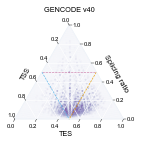

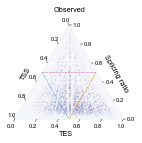

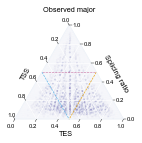

<Figure size 144x1440 with 0 Axes>

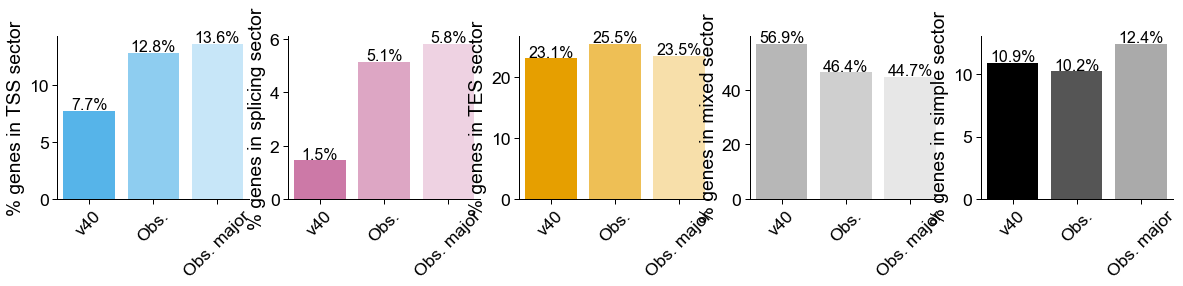

In [15]:
gs_label = gene_subset
if gene_subset == 'polya':
    gs = get_polya_cats()
else: 
    gs = [gene_subset]

plot_df = pd.DataFrame()
for source, title in zip(triplet_sources, titles):

    # subset dict
    subset = {'source': source, 'biotype_category': gs}
    print(subset)

    # if we're looking at gencode, only take detected genes
    if source == 'v40':
        df = pd.read_csv(ab, sep='\t')
        df, inds = get_tpm_table(df,
                                 how='gene',
                                 gene_subset=gs_label,
                                 min_tpm=min_tpm)
        subset['gid'] = inds

    fname = 'figures/simplex_{}_{}.pdf'.format(source, gs_label)
    temp = ca.plot_simplex(top='splicing_ratio',
        subset=subset,
        density=True,
        density_scale=100,
        density_cmap='Purples',
        log_density=True,
        sectors=True,
        scatter=False,
        legend=False,
        title=title,
        size_scale=0.2,
        density_cbar=False,
        fname=fname)

    # add sectors from this subset to plot_df
    temp = assign_gisx_sector(temp)
    plot_df = pd.concat([temp, plot_df])

# create the bar plots
fname = 'figures/{}_genes_per_sector.pdf'.format(gs_label)
make_sector_source_bar_plots(plot_df, fname)